<a href="https://colab.research.google.com/github/Ayushi1429/AI-Job-Market-Analysis/blob/main/AI_Job_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1: Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

sns.set(style='whitegrid')  # Better plot style

# Load dataset
df = pd.read_csv('ai_job_dataset.csv')

# First look
df.head()





,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


**Step 2: Understand the Dataset**

In [ ]:
# Shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Info and missing values
df.info()
print(df.isnull().sum())



Shape: (15000, 19)
Columns: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null

**Step 3: Drop Unnecessary Columns**

In [ ]:
cols_to_drop = ['job_id', 'salary_currency', 'posting_date', 'application_deadline', 'company_name']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


**Step 4: Handle Missing Values**

In [ ]:
# Fill numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with 'Unknown'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')



**Step 5: Basic Statistics & Salary Distribution**

          salary_usd  remote_ratio  years_experience  job_description_length  \
count   15000.000000  15000.000000      15000.000000            15000.000000   
mean   115348.965133     49.483333          6.253200             1503.314733   
std     60260.940438     40.812712          5.545768              576.127083   
min     32519.000000      0.000000          0.000000              500.000000   
25%     70179.750000      0.000000          2.000000             1003.750000   
50%     99705.000000     50.000000          5.000000             1512.000000   
75%    146408.500000    100.000000         10.000000             2000.000000   
max    399095.000000    100.000000         19.000000             2499.000000   

       benefits_score  
count    15000.000000  
mean         7.504273  
std          1.450870  
min          5.000000  
25%          6.200000  
50%          7.500000  
75%          8.800000  
max         10.000000  


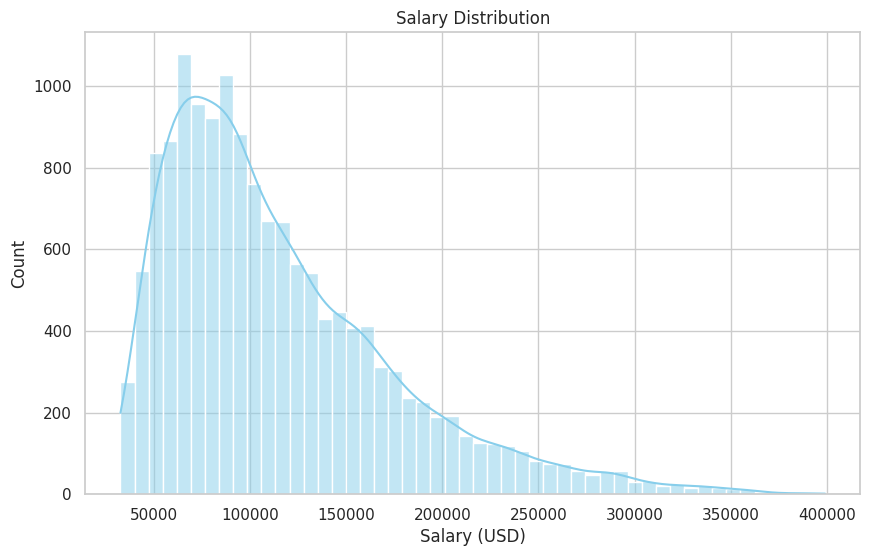

In [ ]:

# Summary statistics
print(df.describe())

# Salary distribution
plt.figure(figsize=(10,6))
sns.histplot(df['salary_usd'], bins=50, kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.show()


**Step 6: Jobs by Experience Level**

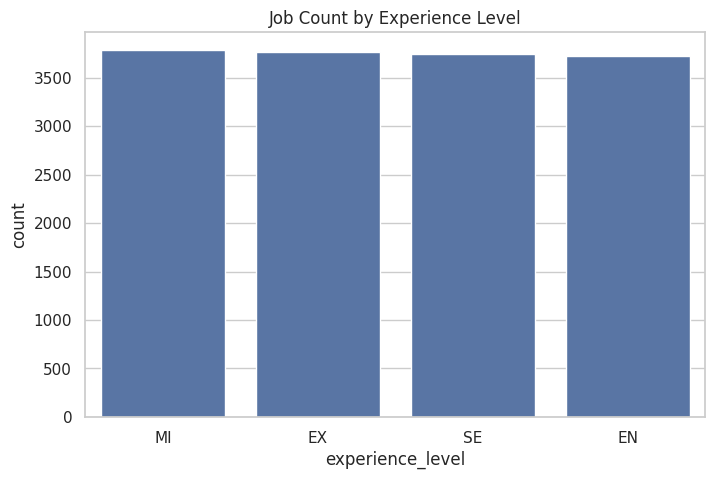

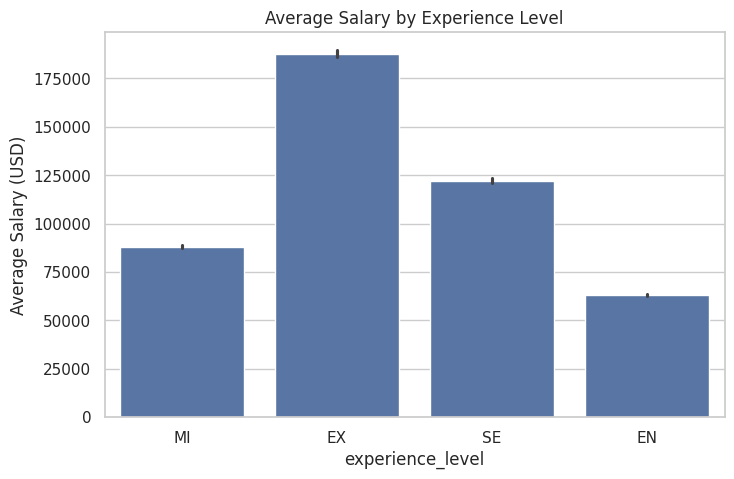

In [ ]:
# Count of jobs
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)
plt.title('Job Count by Experience Level')
plt.show()

# Average salary by experience level
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='experience_level', y='salary_usd', order=df['experience_level'].value_counts().index)
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()


**Step 7: Remote Work & Company Size Impact**

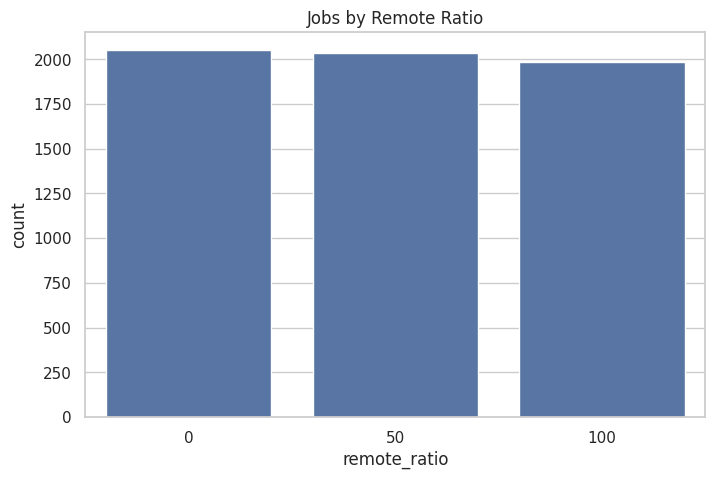

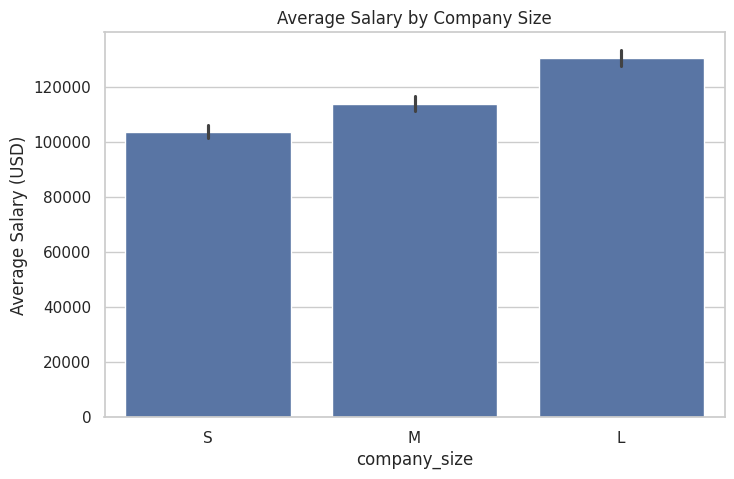

In [ ]:
# Remote Ratio
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='remote_ratio')
plt.title('Jobs by Remote Ratio')
plt.show()

# Salary by company size
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='company_size', y='salary_usd', order=['S','M','L'])
plt.title('Average Salary by Company Size')
plt.ylabel('Average Salary (USD)')
plt.show()


 **Step 8: Top Industries in AI**

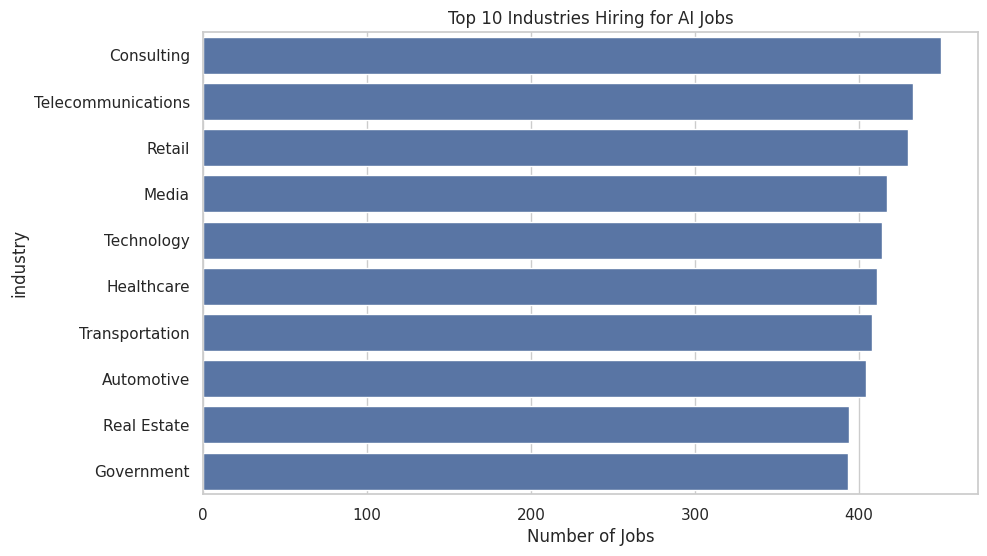

In [ ]:
top_industries = df['industry'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Industries Hiring for AI Jobs')
plt.xlabel('Number of Jobs')
plt.show()


**Step 9: Skill Analysis**

Top 10 Skills in AI Jobs:
[('python', 4450), ('sql', 3407), ('tensorflow', 3022), ('kubernetes', 3009), ('scala', 2794), ('pytorch', 2777), ('linux', 2705), ('git', 2631), ('java', 2578), ('gcp', 2442)]


<ipython-input-4-39218273d3dd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, x='Count', y='Skill', palette='viridis')


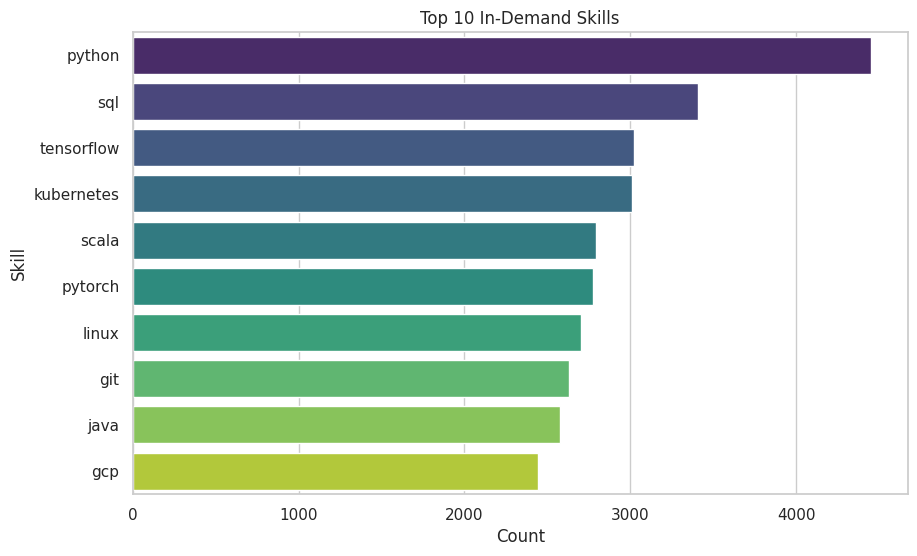

In [ ]:
# Split skill strings and count frequency
skills_series = df['required_skills'].dropna().apply(lambda x: [i.strip().lower() for i in str(x).split(',')])
all_skills = [skill for sublist in skills_series for skill in sublist]
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

print("Top 10 Skills in AI Jobs:")
print(top_skills)

# Convert to DataFrame for plotting
skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=skill_df, x='Count', y='Skill', palette='viridis')
plt.title('Top 10 In-Demand Skills')
plt.show()


 **Step 10: Salary vs Top Skill**s

<ipython-input-5-5b11585aebc7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_skills_df.sort_values(by='Average_Salary', ascending=False), x='Average_Salary', y='Skill', palette='coolwarm')


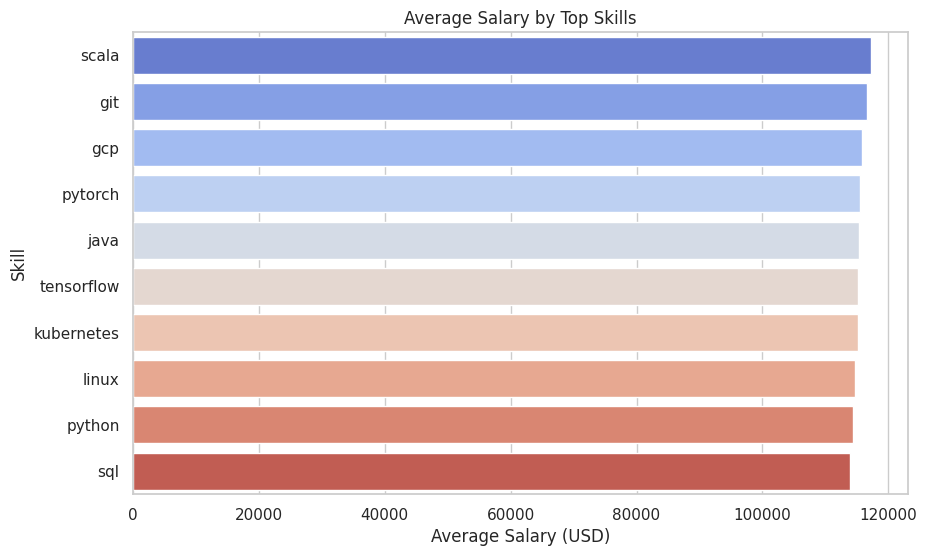

In [ ]:
# Create a new row for each skill per job
skill_salary_data = []

for _, row in df.iterrows():
    if pd.notnull(row['required_skills']):
        skills = [i.strip().lower() for i in row['required_skills'].split(',')]
        for skill in skills:
            skill_salary_data.append((skill, row['salary_usd']))

# Convert to DataFrame
skill_salary_df = pd.DataFrame(skill_salary_data, columns=['Skill', 'Salary'])

# Average salary by skill (top 10 only)
top_skill_names = [s[0] for s in top_skills]
avg_salary_skills_df = skill_salary_df[skill_salary_df['Skill'].isin(top_skill_names)].groupby('Skill')['Salary'].mean().reset_index()
avg_salary_skills_df.rename(columns={'Salary': 'Average_Salary'}, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_salary_skills_df.sort_values(by='Average_Salary', ascending=False), x='Average_Salary', y='Skill', palette='coolwarm')
plt.title('Average Salary by Top Skills')
plt.xlabel('Average Salary (USD)')
plt.show()


**Step 11: Conclusions & Insights**

Python, SQL, and TensorFlow are the most in-demand skills.

Senior-level jobs earn significantly higher salaries.

Fully remote jobs are common and span all salary levels.

Large companies tend to offer higher pay.

Some skills like GCP, PyTorch, and Kubernetes are linked to higher salaries